<a href="https://colab.research.google.com/github/pathakswetank/Sports-Analysis/blob/main/IPL_Bowler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


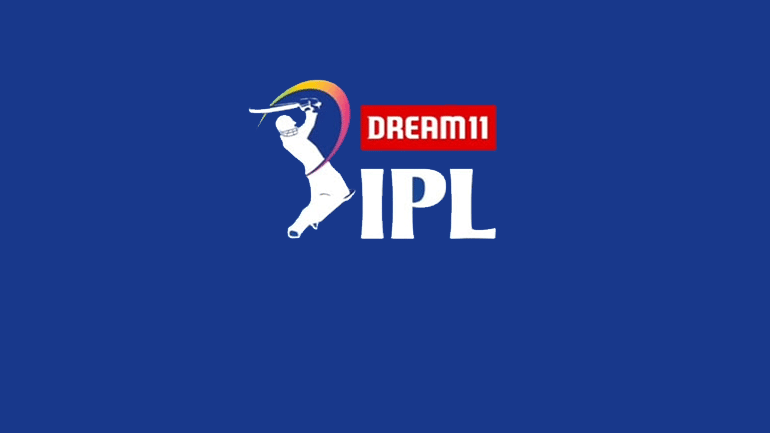

## **The aim of the analysis is to tier the player as per their bowling performance.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_excel("/content/drive/My Drive/Data Science Project/IPL 2020.xlsx", sheet_name= "BOWL")

In [3]:
df.head()

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1,Kagiso Rabada,17,17,65.4,548,30,4/24,18.26,8.34,13.13,2,0.0
1,2,Jasprit Bumrah,15,15,60.0,404,27,4/14,14.96,6.73,13.33,2,0.0
2,3,Trent Boult,15,15,57.2,457,25,4/18,18.28,7.97,13.76,1,0.0
3,4,Anrich Nortje,16,16,61.0,512,22,3/33,23.27,8.39,16.63,0,0.0
4,5,Yuzvendra Chahal,15,15,57.1,405,21,3/18,19.28,7.08,16.33,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     98 non-null     int64  
 1   PLAYER  98 non-null     object 
 2   Mat     98 non-null     int64  
 3   Inns    98 non-null     int64  
 4   Ov      98 non-null     float64
 5   Runs    98 non-null     int64  
 6   Wkts    98 non-null     int64  
 7   BBI     98 non-null     object 
 8   Avg     98 non-null     object 
 9   Econ    98 non-null     float64
 10  SR      98 non-null     object 
 11  4w      98 non-null     int64  
 12  5w      96 non-null     float64
dtypes: float64(3), int64(6), object(4)
memory usage: 10.1+ KB


In [5]:
df.Avg.value_counts()

-        20
33        3
64        2
18.25     2
46        2
         ..
63.16     1
21.45     1
69.33     1
56.33     1
46.2      1
Name: Avg, Length: 74, dtype: int64

In [6]:
df["Avg"]= df["Avg"].replace('-','0')

In [7]:
df.SR.value_counts()

-        20
21        4
30        4
24        3
42        3
         ..
13.33     1
48        1
25.44     1
19.2      1
45.6      1
Name: SR, Length: 61, dtype: int64

In [8]:
df["SR"]= df["SR"].replace('-','0')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     98 non-null     int64  
 1   PLAYER  98 non-null     object 
 2   Mat     98 non-null     int64  
 3   Inns    98 non-null     int64  
 4   Ov      98 non-null     float64
 5   Runs    98 non-null     int64  
 6   Wkts    98 non-null     int64  
 7   BBI     98 non-null     object 
 8   Avg     98 non-null     object 
 9   Econ    98 non-null     float64
 10  SR      98 non-null     object 
 11  4w      98 non-null     int64  
 12  5w      96 non-null     float64
dtypes: float64(3), int64(6), object(4)
memory usage: 10.1+ KB


In [10]:
df["Avg"]= df["Avg"].astype('float')
df["SR"]= df["SR"].astype('float')

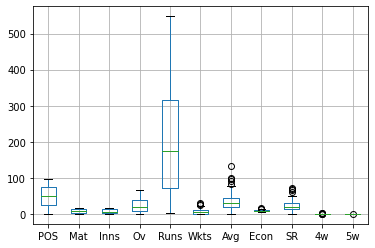

In [11]:
df.boxplot()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POS,98.0,49.500000,28.434134,1.00,25.2500,49.500,73.750,98.0
Mat,98.0,8.091837,5.209204,1.00,3.0000,7.000,13.750,17.0
Inns,98.0,7.040816,5.123060,1.00,2.2500,6.000,12.500,17.0
Ov,98.0,23.762245,19.263263,0.10,7.2500,18.550,37.550,65.4
Runs,98.0,194.591837,144.038714,2.00,72.0000,175.500,314.500,548.0
Wkts,98.0,6.377551,6.830066,0.00,1.0000,4.000,10.000,30.0
Avg,98.0,32.037347,25.839083,0.00,18.2525,29.245,44.245,133.0
Econ,98.0,8.881224,1.905537,5.37,7.5800,8.570,9.825,16.0
SR,98.0,22.141122,16.533459,0.00,13.3725,20.500,30.000,72.0
4w,98.0,0.071429,0.329010,0.00,0.0000,0.000,0.000,2.0


In [13]:
df.isnull().sum()
df.shape

(98, 13)

In [14]:
df = df.dropna()

In [15]:
df.shape

(96, 13)

In [16]:
ipl_bowl = df.drop(columns = ['PLAYER', 'POS', 'BBI', 'Runs'])
ipl_bowl

,Mat,Inns,Ov,Wkts,Avg,Econ,SR,4w,5w
0,17,17,65.4,30,18.26,8.34,13.13,2,0.0
1,15,15,60.0,27,14.96,6.73,13.33,2,0.0
2,15,15,57.2,25,18.28,7.97,13.76,1,0.0
3,16,16,61.0,22,23.27,8.39,16.63,0,0.0
4,15,15,57.1,21,19.28,7.08,16.33,0,0.0
...,...,...,...,...,...,...,...,...,...
91,1,1,3.0,0,0.00,11.33,0.00,0,0.0
92,14,2,2.0,0,0.00,11.50,0.00,0,0.0
93,3,3,8.0,0,0.00,11.75,0.00,0,0.0
94,2,2,7.0,0,0.00,11.85,0.00,0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = StandardScaler()

In [19]:
scaled_df= X.fit_transform(ipl_bowl)
scaled_df

array([[ 1.75132218e+00,  1.93569932e+00,  2.15776111e+00,
         3.45320342e+00, -5.65361752e-01, -2.52085809e-01,
        -5.81033656e-01,  5.82984480e+00, -1.02597835e-01],
       [ 1.36348613e+00,  1.54241438e+00,  1.87470444e+00,
         3.01217345e+00, -6.94522062e-01, -1.13318899e+00,
        -5.68765721e-01,  5.82984480e+00, -1.02597835e-01],
       [ 1.36348613e+00,  1.54241438e+00,  1.72793431e+00,
         2.71815346e+00, -5.64578962e-01, -4.54575361e-01,
        -5.42389662e-01,  2.80462804e+00, -1.02597835e-01],
       [ 1.55740415e+00,  1.73905685e+00,  1.92712234e+00,
         2.27712349e+00, -3.69272916e-01, -2.24722357e-01,
        -3.66344803e-01, -2.20588722e-01, -1.02597835e-01],
       [ 1.36348613e+00,  1.54241438e+00,  1.72269252e+00,
         2.13011350e+00, -5.25439474e-01, -9.41644822e-01,
        -3.84746705e-01, -2.20588722e-01, -1.02597835e-01],
       [ 1.55740415e+00,  1.73905685e+00,  2.08437605e+00,
         1.98310351e+00, -6.06849609e-01, -1.877474

In [20]:
from sklearn.cluster import KMeans

In [21]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [22]:
wss

[864.0,
 576.4602671623786,
 457.6285410860627,
 365.54604393987285,
 281.6505554061713,
 219.43852064003153,
 187.87301801660345,
 170.09835886142548,
 153.02454474151142,
 131.80978774668665]

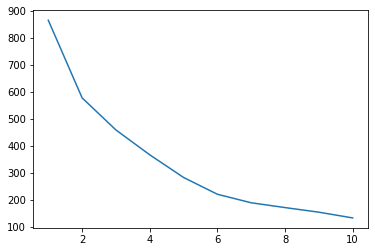

In [23]:
plt.plot(range(1,11), wss)

In [24]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [25]:
df["Clus_kmeans"] = labels
df.head(20)

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w,Clus_kmeans
0,1,Kagiso Rabada,17,17,65.4,548,30,4/24,18.26,8.34,13.13,2,0.0,1
1,2,Jasprit Bumrah,15,15,60.0,404,27,4/14,14.96,6.73,13.33,2,0.0,1
2,3,Trent Boult,15,15,57.2,457,25,4/18,18.28,7.97,13.76,1,0.0,1
3,4,Anrich Nortje,16,16,61.0,512,22,3/33,23.27,8.39,16.63,0,0.0,1
4,5,Yuzvendra Chahal,15,15,57.1,405,21,3/18,19.28,7.08,16.33,0,0.0,1
5,6,Rashid Khan,16,16,64.0,344,20,3/7,17.20,5.37,19.20,0,0.0,1
6,7,Jofra Archer,14,14,55.4,365,20,3/19,18.25,6.55,16.70,0,1.0,1
7,8,Mohammad Shami,14,14,53.4,460,20,3/15,23.00,8.57,16.10,0,0.0,1
8,9,Varun Chakravarthy,13,13,52.0,356,17,5/20,20.94,6.84,18.35,0,0.0,1
9,10,T Natarajan,16,16,62.5,504,16,2/24,31.50,8.02,23.56,0,0.0,1


In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(scaled_df,labels)

0.2898840055394196

In [27]:
sil_width = silhouette_samples(scaled_df,labels)

In [28]:
df["sil_width"] = sil_width
df.head(5)

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w,Clus_kmeans,sil_width
0,1,Kagiso Rabada,17,17,65.4,548,30,4/24,18.26,8.34,13.13,2,0.0,1,0.227831
1,2,Jasprit Bumrah,15,15,60.0,404,27,4/14,14.96,6.73,13.33,2,0.0,1,0.222805
2,3,Trent Boult,15,15,57.2,457,25,4/18,18.28,7.97,13.76,1,0.0,1,0.336989
3,4,Anrich Nortje,16,16,61.0,512,22,3/33,23.27,8.39,16.63,0,0.0,1,0.433819
4,5,Yuzvendra Chahal,15,15,57.1,405,21,3/18,19.28,7.08,16.33,0,0.0,1,0.446951


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


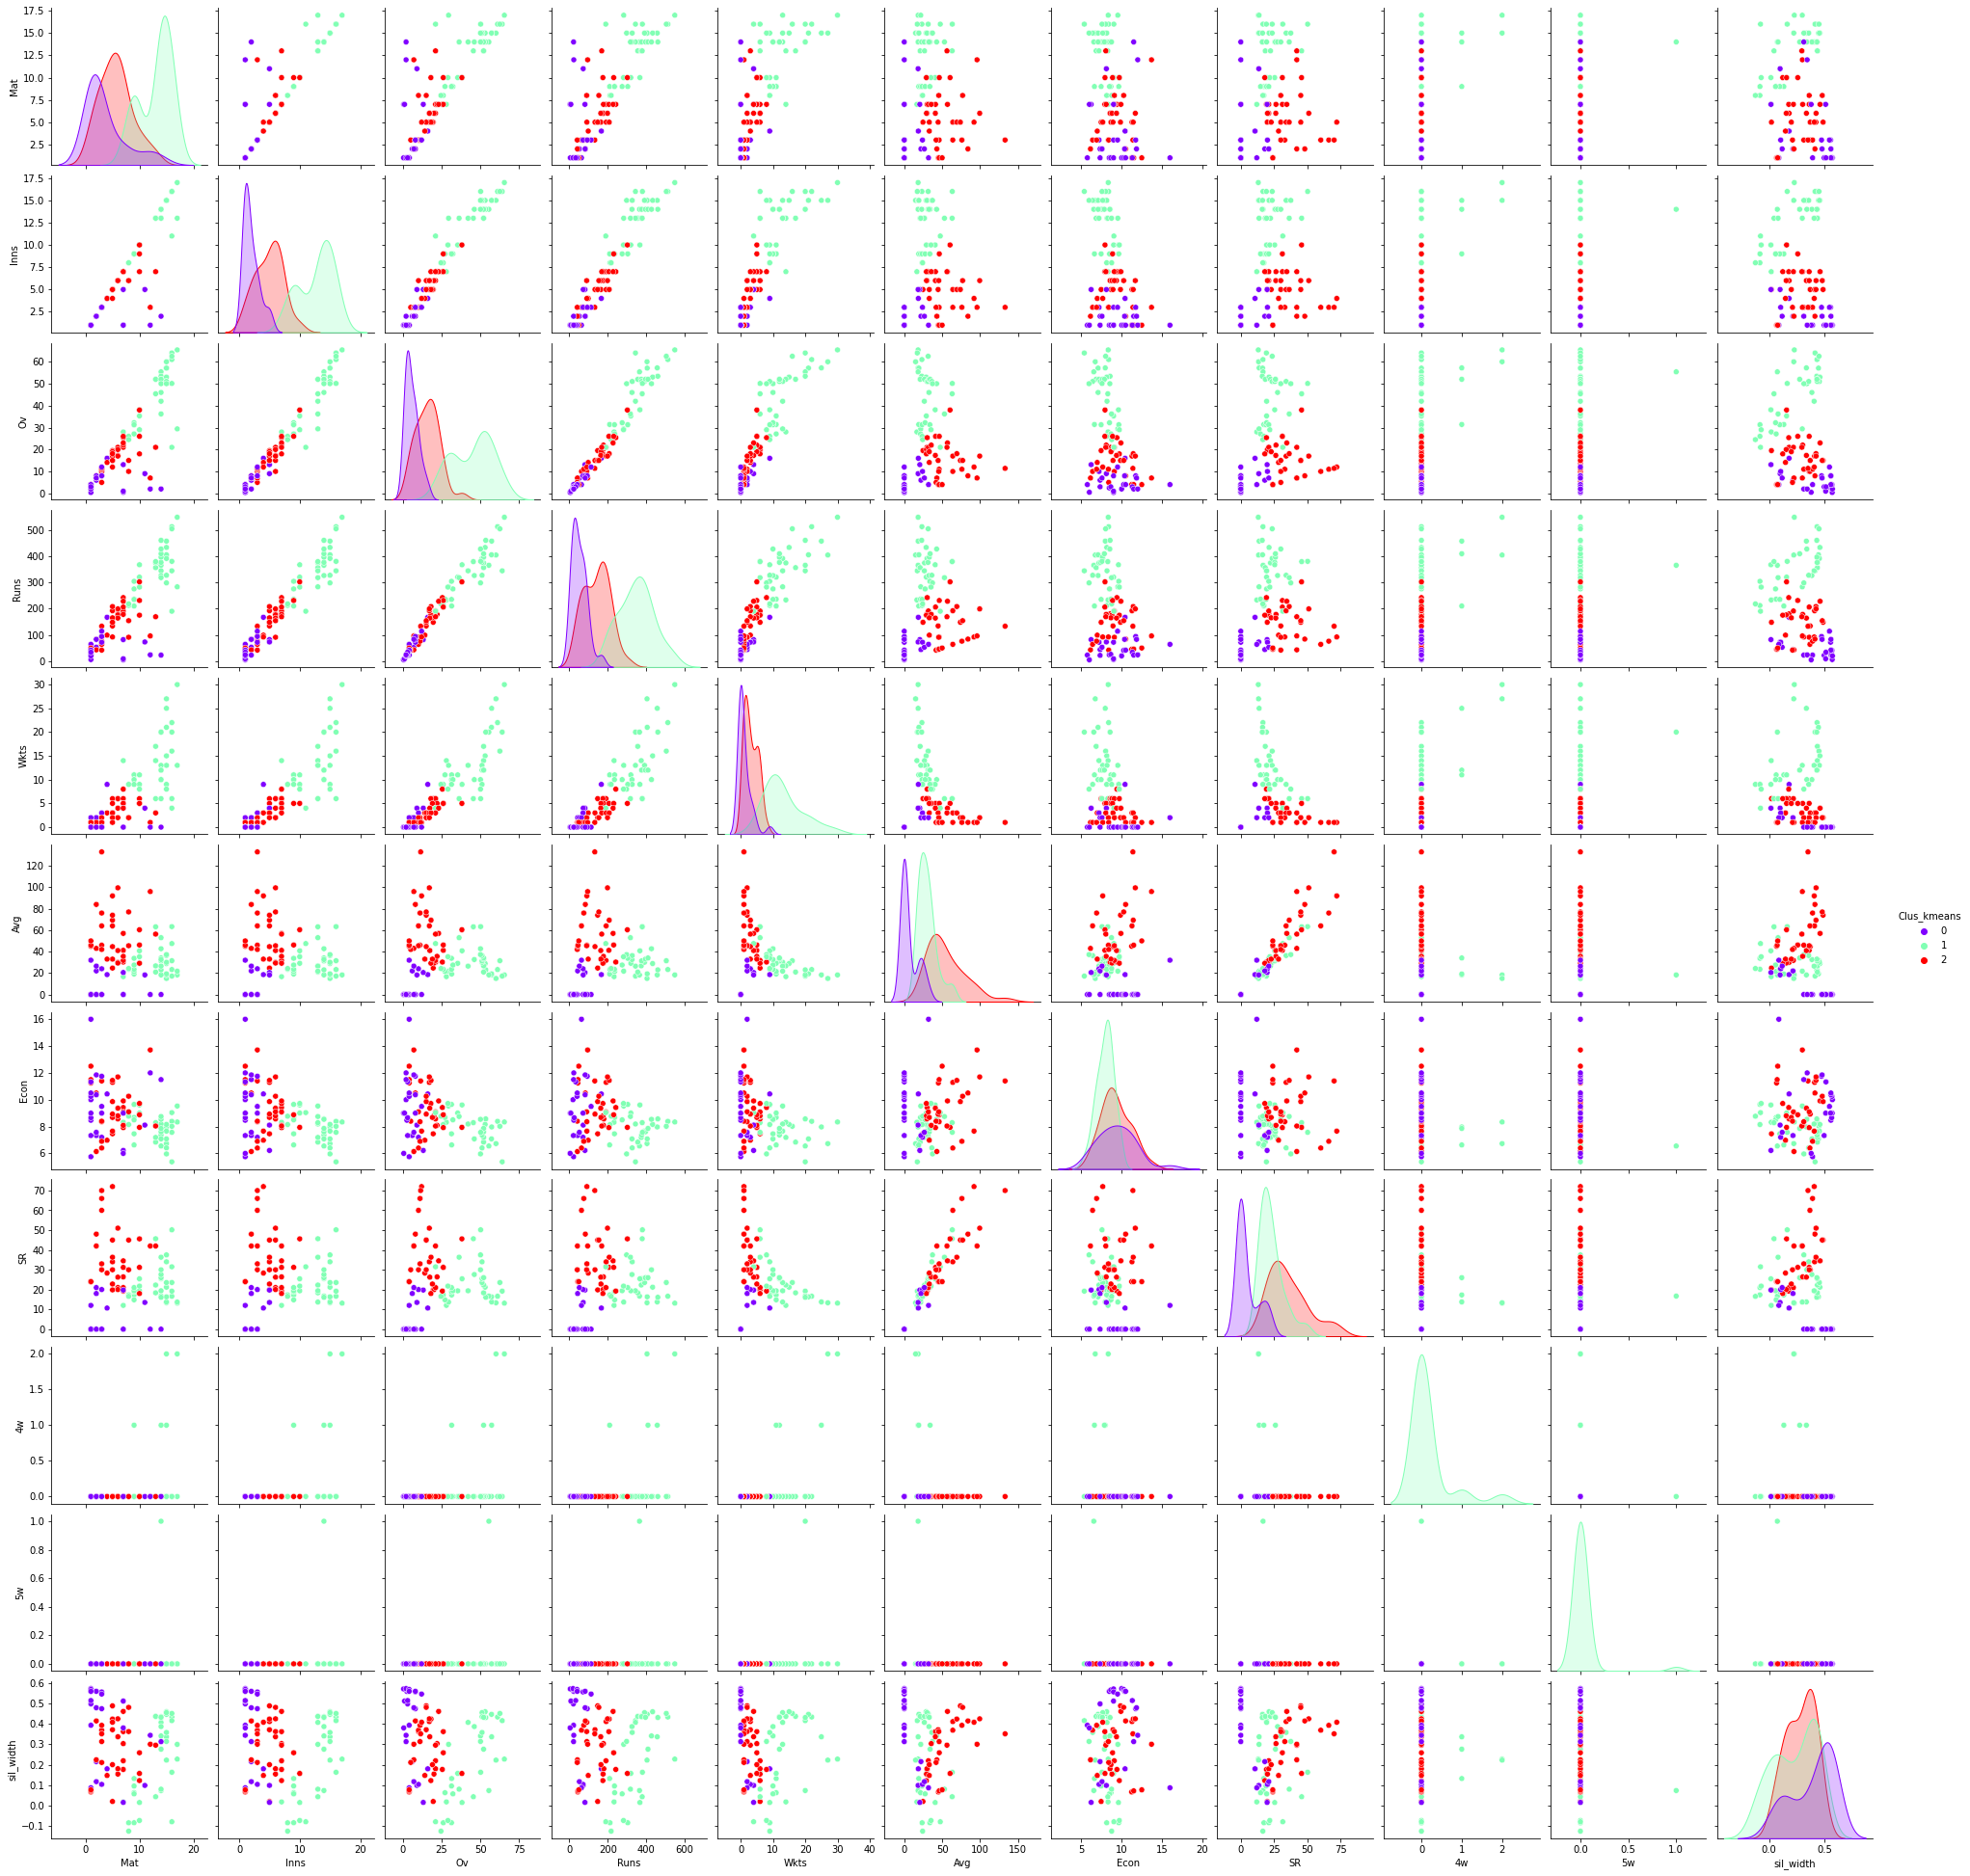

In [29]:
sns.pairplot(df.drop(['PLAYER' , 'BBI', 'POS'],axis=1), hue = "Clus_kmeans", palette= "rainbow")

In [30]:
clust_profile=df.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile

,POS,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w,sil_width,freq
Clus_kmeans,,,,,,,,,,,,,
0,77.960000,3.680000,1.960000,5.580000,52.000000,1.040000,6.472000,9.404800,4.596400,0.000000,0.000000,0.391641,25
1,19.729730,13.027027,12.729730,44.710811,348.594595,13.297297,29.943514,7.934324,22.735946,0.189189,0.027027,0.228871,37
2,58.147059,5.617647,4.911765,15.670588,142.441176,3.147059,54.998529,9.299118,35.696765,0.000000,0.000000,0.281460,34


In [31]:
clust_profile1=df.groupby('Clus_kmeans').std()
clust_profile1['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile1

,POS,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w,sil_width,freq
Clus_kmeans,,,,,,,,,,,,,
0,17.215497,3.804822,1.274101,4.137531,38.554075,2.111082,10.871399,2.323735,7.817650,0.000000,0.000000,0.191388,25
1,12.180697,2.920107,2.795320,12.800603,89.202784,6.141231,11.990533,1.049260,8.916622,0.518429,0.164399,0.195215,37
2,13.232495,3.035294,2.247796,7.633242,66.710678,2.061661,24.784229,1.791905,14.821969,0.000000,0.000000,0.131685,34


In [32]:
pd.crosstab(df.PLAYER,df.Clus_kmeans).T

PLAYER,Abdul Samad,Abhishek Sharma,Adam Zampa,Amit Mishra,Andrew Tye,Andre Russell,Ankit Rajpoot,Anrich Nortje,Arshdeep Singh,Avesh Khan,Axar Patel,Basil Thampi,Ben Stokes,Bhuvneshwar Kumar,Chris Gayle,Chris Green,Chris Jordan,Chris Morris,Dale Steyn,Daniel Sams,Deepak Chahar,Deepak Hooda,Dhawal Kulkarni,Dwayne Bravo,Glenn Maxwell,Harpreet Brar,Harshal Patel,Imran Tahir,Ishant Sharma,Isuru Udana,James Pattinson,Jason Holder,Jasprit Bumrah,Jayant Yadav,Jaydev Unadkat,Jimmy Neesham,Jofra Archer,Josh Hazlewood,Kagiso Rabada,Kamlesh Nagarkoti,...,Mohammed Siraj,Mohit Sharma,Monu Kumar,Mujeeb Ur Rahman,Murugan Ashwin,Nathan Coulter-Nile,Navdeep Saini,Nitish Rana,Pat Cummins,Piyush Chawla,Prasidh Krishna,Pravin Dubey,Rahul Chahar,Rahul Tewatia,Rashid Khan,Ravichandran Ashwin,Ravindra Jadeja,Ravi Bishnoi,Sam Curran,Sandeep Sharma,Sandeep Warrier,Shahbaz Ahmed,Shahbaz Nadeem,Shardul Thakur,Sheldon Cottrell,Shivam Dube,Shivam Mavi,Shreyas Gopal,Siddarth Kaul,Sunil Narine,Tom Curran,Trent Boult,Tushar Deshpande,T Natarajan,Umesh Yadav,Varun Aaron,Varun Chakravarthy,Vijay Shankar,Washington Sundar,Yuzvendra Chahal
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0
1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,1
2,1,1,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0


In [33]:
df.groupby(['PLAYER','Clus_kmeans']).last()

,,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w,sil_width
PLAYER,Clus_kmeans,,,,,,,,,,,,,
Abdul Samad,2,78,12,3,7.0,96,1,1/41,96.00,13.71,42.00,0,0.0,0.300623
Abhishek Sharma,2,63,8,6,10.0,91,2,1/15,45.50,9.10,30.00,0,0.0,0.362744
Adam Zampa,2,62,3,3,11.0,92,2,1/12,46.00,8.36,33.00,0,0.0,0.313668
Amit Mishra,0,55,3,3,10.0,72,3,2/35,24.00,7.20,20.00,0,0.0,0.104217
Andrew Tye,2,77,1,1,4.0,50,1,1/50,50.00,12.50,24.00,0,0.0,0.077522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Varun Aaron,0,94,3,3,8.0,94,0,0/22,0.00,11.75,0.00,0,0.0,0.474531
Varun Chakravarthy,1,9,13,13,52.0,356,17,5/20,20.94,6.84,18.35,0,0.0,0.437006
Vijay Shankar,0,49,7,5,13.1,82,4,1/11,20.50,6.22,19.75,0,0.0,0.015945


In [34]:
df.to_csv('ipl_bowler_tier.csv')

**A TIER 1 CATEGORY BOWLER WERE THOSE WHO HAD  PERFORMED VERY WELL IN EVERY ASPECTS PARTICULARLY NUMBER OF WICKETS TAKEN, ECONOMY AND STRIKE RATE.**

**A TIER 2 CATEGORY BOWLER WERE THOSE WHO HAD  PERFORMED MODERATELY IN ATTRIBUTES LIKE NUMBER OF WICKETS TAKEN, ECONOMY AND STRIKE RATE**.

**A TIER 3 CATEGORY BOWLER WERE THOSE WHO HAD  PERFORMED VERY POOR IN EVERY ASPECTS NUMBER OF WICKETS TAKEN, ECONOMY AND STRIKE RATE.**

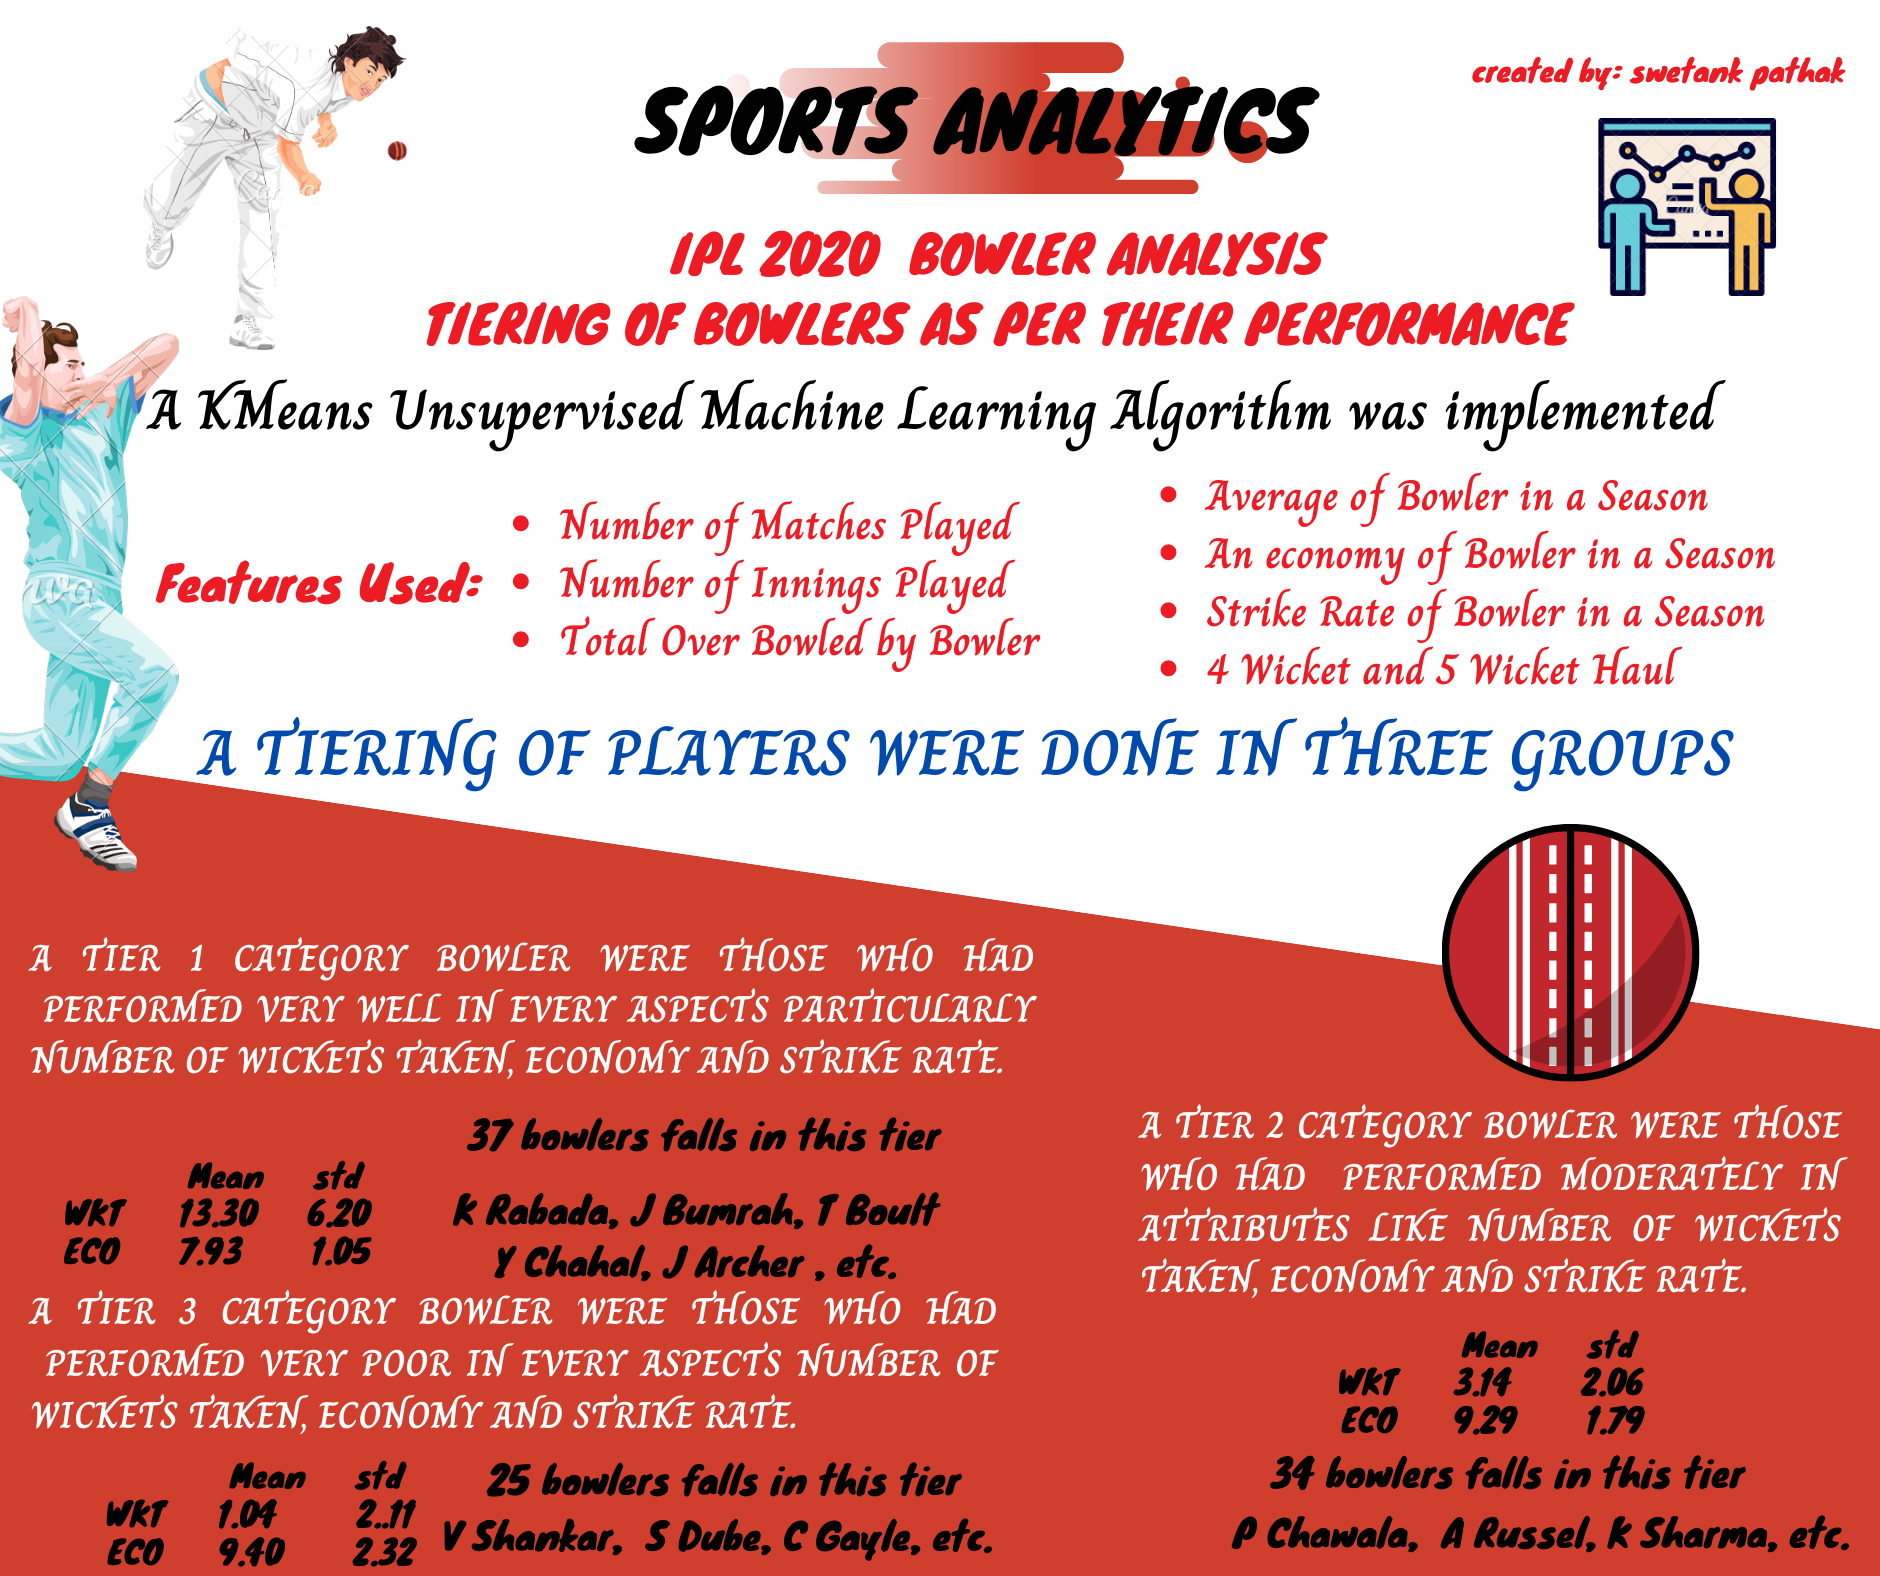